In [222]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (20,10)


In [223]:
#from google.colab import drive
#drive.mount('/content/drive')

In [224]:
#path = 'https://drive.google.com/file/d/1t9kdQAF94NrOsZoHyA4SaepxksPKm0IQ/view?usp=drive_link'

#df = pd.read_csv(path)

Load dataset

In [225]:
df = pd.read_csv('/content/house_prices.csv')

In [226]:
df.head()

,Title,Sub_title,Price,Address,Baths,Land size,Beds,House size,Location,Description,Post_URL,Seller_name,Seller_type,published_date,Geo_Address,Lat,Lon
0,House with Land for Sale in Matara for sale,"Posted on 06 Nov 2:32 pm, Matara City, Matara","Rs 5,400,000","Gangodagama Roard,Hakmana,Matara.",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara","Land for sale with house Matara,Hakmana Gangod...",https://ikman.lk/en/ad/house-with-land-for-sal...,Ishara Dilshan,Member,2021-11-06 14:32:00,"Matara City, Matara, Sri Lanka",80.500000,6.166670
1,à¶ à¶½à·à¶­à· à¶à·à¶¸à¶» 3 à¶ à¶à·à· à...,"Posted on 24 Oct 7:27 am, Athurugiriya, Colombo","Rs 16,800,000",Athurugiriya Galwarusapare,3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",*House For Sale In Athurugiriya *Galwarusapare...,https://ikman.lk/en/ad/alut-kaamr-3-k-grh-bhaa...,DILRUWAN REAL ESTATE,Premium-Member,2021-10-24 07:27:00,"Athurugiriya, Colombo, Sri Lanka",79.989929,6.877246
2,Kelaniya - House on 20P Land for sale for sale,"Posted on 17 Nov 5:19 pm, Kelaniya, Gampaha","Rs 20,000,000",Kelaniya- Ranaviru Maldeniya Road,2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha","Kelaniya- Biyagama road, Ranaviru Maladeniya R...",https://ikman.lk/en/ad/kelaniya-house-on-20p-l...,Provident Paradise (Pvt) Ltd,Member,2021-11-17 17:19:00,"Kelaniya, Gampaha, Sri Lanka",79.914926,6.951178
3,House For Sale in Pamankada Lane Wellawatte Co...,"Posted on 17 Nov 5:07 pm, Colombo 6, Colombo","Rs 187,000,000",Pamankada Lane Wellawatte Colombo.06,5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",22 Perches House For Sale in Pamankada Lane We...,https://ikman.lk/en/ad/house-for-sale-in-paman...,Colombo Construction Property Developers,Premium-Member,2021-11-17 17:07:00,"Colombo 6, Colombo, Sri Lanka",80.016670,6.866670
4,House For Sale - Attidiya for sale,"Posted on 17 Nov 5:06 pm, Dehiwala, Colombo","Rs 1,300,000",MainRoad Attidiya,1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",*à¶ à¶­à·à¶­à·à¶©à·à¶º à¶´à·âà¶»à¶¯à·à·...,https://ikman.lk/en/ad/house-for-sale-attidiya...,Lakdinu Houses,Member,2021-11-17 17:06:00,"Dehiwala, Colombo, Sri Lanka",79.880242,6.838232


In [227]:
df.shape

(15327, 17)

##Data Cleaning

Drop unwanted columns

In [228]:
df1 = df.drop(['Title','Sub_title', 'Address', 'Description', 'Post_URL', 'Seller_name', 'Seller_type', 'published_date', 'Geo_Address'], axis=1)

In [229]:
df1.head()

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246
2,"Rs 20,000,000",2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha",79.914926,6.951178
3,"Rs 187,000,000",5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",80.016670,6.866670
4,"Rs 1,300,000",1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",79.880242,6.838232


In [230]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Price       15327 non-null  object 
 1   Baths       15327 non-null  object 
 2   Land size   15327 non-null  object 
 3   Beds        15327 non-null  object 
 4   House size  15327 non-null  object 
 5   Location    15327 non-null  object 
 6   Lat         15327 non-null  float64
 7   Lon         15327 non-null  float64
dtypes: float64(2), object(6)
memory usage: 958.1+ KB


In [231]:
df1.isnull().sum()

Price         0
Baths         0
Land size     0
Beds          0
House size    0
Location      0
Lat           0
Lon           0
dtype: int64

In [232]:
df1.Baths.unique()

array(['1', '3', '2', '5', '4', '10+', '7', '6', '8', '10', '9'],
      dtype=object)

In [233]:
df1.Beds.unique()

array(['3', '5', '2', '4', '10+', '9', '8', '6', '7', '1', '10'],
      dtype=object)

Price column handle

In [234]:
#Remove Rs

df1['price'] = df1['Price'].apply(lambda x: (x.split(' ')[1]))

In [235]:
df1.head(2)

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,"5,400,000"
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,"16,800,000"


In [236]:
# Replace ',' with empty and convert to string

df1['price'] = df1['price'].apply(lambda x: int(x.replace(',', '')))

In [237]:
df1.head(2)

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,5400000
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,16800000


Land size column

In [238]:
# filter number
df1['perches'] = df1['Land size'].apply(lambda x: (x.split(' ')[0]))
# remove ',' and convert to float and convert perchase to squre feet
df1['land_size'] = df1['perches'].apply(lambda x: float(x.replace(',',''))*272.25)

In [239]:
df1.head(2)

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price,perches,land_size
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,5400000,50.0,13612.5
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,16800000,8.0,2178.0


House size column

In [240]:
df1['house_size'] = df1['House size'].apply(lambda x: (x.split(' ')[0]))

df1['house_size'] = df1['house_size'].apply(lambda x: float(x.replace(',','')))

In [241]:
df1.head(2)

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price,perches,land_size,house_size
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,5400000,50.0,13612.5,1600.0
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,16800000,8.0,2178.0,1480.0


Location column

In [242]:
# Filter district
df1['location'] = df1['Location'].apply(lambda x: (x.split(',')[0]))

# Remove space between words
df1['location'] = df1['location'].apply(lambda x: (x.replace(' ', '')))

In [243]:
df1.head(2)

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price,perches,land_size,house_size,location
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,5400000,50.0,13612.5,1600.0,MataraCity
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,16800000,8.0,2178.0,1480.0,Athurugiriya


In [244]:
df1['location'].unique()

array(['MataraCity', 'Athurugiriya', 'Kelaniya', 'Colombo6', 'Dehiwala',
       'Talawatugoda', 'KandyCity', 'Piliyandala', 'Kadawatha',
       'GampahaCity', 'Katugastota', 'Negombo', 'Malabe', 'JaffnaCity',
       'Rajagiriya', 'MountLavinia', 'Battaramulla', 'Moratuwa',
       'Nugegoda', 'Kottawa', 'Homagama', 'Minuwangoda', 'Elpitiya',
       'Gampola', 'Karapitiya', 'Colombo9', 'Ratmalana', 'KalutaraCity',
       'Boralesgamuwa', 'Baddegama', 'Kotte', 'Kandana', 'KurunegalaCity',
       'Nittambuwa', 'Ragama', 'Ja-Ela', 'Chilaw', 'Padukka', 'Horana',
       'Wellampitiya', 'MonaragalaCity', 'Colombo5', 'Kaduwela',
       'Colombo3', 'Kohuwala', 'Pannipitiya', 'Kolonnawa', 'Matugama',
       'Ganemulla', 'Dikwella', 'Angoda', 'Delgoda', 'Wadduwa',
       'Ruwanwella', 'Colombo7', 'Yatiyantota', 'Colombo4', 'Dambulla',
       'Ambalangoda', 'Weligama', 'Colombo15', 'Haputale', 'Beliatta',
       'Kesbewa', 'Wattala', 'Wennappuwa', 'Eheliyagoda', 'Peradeniya',
       'Digana', 'Mawa

In [245]:
# sort data per location in descending order

location_stats = df1.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Piliyandala      2806
Malabe           1590
Negombo          1363
Talawatugoda     1296
Kottawa           750
                 ... 
Galigamuwa          1
Galgamuwa           1
MullativuCity       1
Eppawala            1
Giriulla            1
Name: location, Length: 172, dtype: int64

In [246]:
#Locations count less than 5
len(location_stats[location_stats <= 5])

67

In [247]:
location_stats_less_than_5 = location_stats[location_stats <= 5]
location_stats_less_than_5

location
Ampitiya          5
MonaragalaCity    5
Beliatta          5
Gelioya           5
Beruwala          5
                 ..
Galigamuwa        1
Galgamuwa         1
MullativuCity     1
Eppawala          1
Giriulla          1
Name: location, Length: 67, dtype: int64

In [248]:
# Assign count less than 5 to 'Other'
df1.location = df1.location.apply(lambda x: 'other' if x in location_stats_less_than_5 else x)
len(df1.location.unique())

106

In [249]:
df1.Baths.unique()

array(['1', '3', '2', '5', '4', '10+', '7', '6', '8', '10', '9'],
      dtype=object)

In [250]:
df1.Beds.unique()

array(['3', '5', '2', '4', '10+', '9', '8', '6', '7', '1', '10'],
      dtype=object)

Bath rooms and bed room columns

In [251]:
df1['bath'] = df1['Baths'].apply(lambda x: int(x.replace('+', '')))

df1['bed'] = df1['Beds'].apply(lambda x: int(x.replace('+', '')))

In [252]:
df1.bath.unique()

array([ 1,  3,  2,  5,  4, 10,  7,  6,  8,  9])

In [253]:
df1.bed.unique()

array([ 3,  5,  2,  4, 10,  9,  8,  6,  7,  1])

Remove unwanted coulmns

In [254]:
df1.columns

Index(['Price', 'Baths', 'Land size', 'Beds', 'House size', 'Location', 'Lat',
       'Lon', 'price', 'perches', 'land_size', 'house_size', 'location',
       'bath', 'bed'],
      dtype='object')

In [255]:
df1.head()

,Price,Baths,Land size,Beds,House size,Location,Lat,Lon,price,perches,land_size,house_size,location,bath,bed
0,"Rs 5,400,000",1,50.0 perches,3,"1,600.0 sqft","Matara City, Matara",80.500000,6.166670,5400000,50.0,13612.500,1600.0,MataraCity,1,3
1,"Rs 16,800,000",3,8.0 perches,3,"1,480.0 sqft","Athurugiriya, Colombo",79.989929,6.877246,16800000,8.0,2178.000,1480.0,Athurugiriya,3,3
2,"Rs 20,000,000",2,20.0 perches,3,"2,800.0 sqft","Kelaniya, Gampaha",79.914926,6.951178,20000000,20.0,5445.000,2800.0,Kelaniya,2,3
3,"Rs 187,000,000",5,22.0 perches,5,"4,000.0 sqft","Colombo 6, Colombo",80.016670,6.866670,187000000,22.0,5989.500,4000.0,Colombo6,5,5
4,"Rs 1,300,000",1,6.3 perches,2,900.0 sqft,"Dehiwala, Colombo",79.880242,6.838232,1300000,6.3,1715.175,900.0,Dehiwala,1,2


In [256]:
df2 = df1.drop(['Price', 'Baths', 'Land size', 'Beds', 'House size', 'Location', 'perches'], axis=1)

#we can also remove location because there is lon, lat present

In [257]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15327 entries, 0 to 15326
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Lat         15327 non-null  float64
 1   Lon         15327 non-null  float64
 2   price       15327 non-null  int64  
 3   land_size   15327 non-null  float64
 4   house_size  15327 non-null  float64
 5   location    15327 non-null  object 
 6   bath        15327 non-null  int64  
 7   bed         15327 non-null  int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 958.1+ KB


In [258]:
df3 = df2.copy()

##Outlier Removal

In [259]:
df3.head()

,Lat,Lon,price,land_size,house_size,location,bath,bed
0,80.500000,6.166670,5400000,13612.500,1600.0,MataraCity,1,3
1,79.989929,6.877246,16800000,2178.000,1480.0,Athurugiriya,3,3
2,79.914926,6.951178,20000000,5445.000,2800.0,Kelaniya,2,3
3,80.016670,6.866670,187000000,5989.500,4000.0,Colombo6,5,5
4,79.880242,6.838232,1300000,1715.175,900.0,Dehiwala,1,2


In [260]:
df3.shape

(15327, 8)

In [261]:
df3[(df3.house_size / df3.land_size) > 1]

,Lat,Lon,price,land_size,house_size,location,bath,bed
5,80.016670,6.866670,55000000,2994.750,3300.0,Talawatugoda,4,4
6,80.625828,7.295044,45000000,2722.500,4100.0,KandyCity,4,4
8,80.016670,6.866670,50000000,2722.500,4000.0,Talawatugoda,4,4
10,80.000000,7.133330,19500000,2722.500,5000.0,GampahaCity,2,4
12,79.843249,7.206416,26500000,2858.625,3100.0,Negombo,3,4
...,...,...,...,...,...,...,...,...
15313,79.922703,6.801844,28500000,2096.325,2500.0,Piliyandala,4,5
15315,79.922703,6.801844,36000000,2314.125,3100.0,Piliyandala,4,4
15317,79.922703,6.801844,26000000,1905.750,2200.0,Piliyandala,3,4
15318,79.922703,6.801844,25500000,2041.875,3240.0,Piliyandala,4,4


Ignore 'land_size' column there has more outliers

In [262]:
df3.drop('land_size', axis=1, inplace=True)

In [263]:
df3.head(2)

,Lat,Lon,price,house_size,location,bath,bed
0,80.500000,6.166670,5400000,1600.0,MataraCity,1,3
1,79.989929,6.877246,16800000,1480.0,Athurugiriya,3,3


In [264]:
df3[df3.bath > df3.bed].head()

,Lat,Lon,price,house_size,location,bath,bed
18,79.913892,6.897711,55000000,3000.0,Battaramulla,5,4
91,79.954619,6.904072,35500000,4500.0,Malabe,5,4
115,80.016670,6.866670,70000000,7240.0,Talawatugoda,6,5
152,79.922703,6.801844,25500000,2500.0,Piliyandala,5,4
213,80.016670,6.866670,170000000,1400.0,Talawatugoda,7,6


In [265]:
# Remove rows with more bath rooms than bed rooms

df4 = df3[~(df3.bath > df3.bed)]

In [266]:
df4['price_per_sqft'] = df4['price']/df4['house_size']

<ipython-input-266-2b79aa03000a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['price_per_sqft'] = df4['price']/df4['house_size']


In [267]:
df4.head()

,Lat,Lon,price,house_size,location,bath,bed,price_per_sqft
0,80.500000,6.166670,5400000,1600.0,MataraCity,1,3,3375.000000
1,79.989929,6.877246,16800000,1480.0,Athurugiriya,3,3,11351.351351
2,79.914926,6.951178,20000000,2800.0,Kelaniya,2,3,7142.857143
3,80.016670,6.866670,187000000,4000.0,Colombo6,5,5,46750.000000
4,79.880242,6.838232,1300000,900.0,Dehiwala,1,2,1444.444444


Bedrooms less than 300

In [268]:
df4[(df4.house_size/df4.bed) < 300].head()

,Lat,Lon,price,house_size,location,bath,bed,price_per_sqft
29,80.161905,6.291885,4500000,750.0,Elpitiya,1,3,6000.000000
95,80.061949,6.716628,7500000,850.0,Horana,1,3,8823.529412
269,80.016670,6.866670,15000000,820.0,Colombo5,2,3,18292.682927
464,79.930510,6.663973,6500000,800.0,Wadduwa,1,3,8125.000000
478,79.910472,6.714417,51000000,1200.0,Panadura,1,6,42500.000000


In [269]:
# drop bedrooms less than 300

df5 = df4[~((df4.house_size/df4.bed) < 300)]

In [270]:
df5.price_per_sqft.describe()

count     14628.000000
mean      12174.342612
std        9519.165884
min           1.000000
25%        8412.698413
50%       10250.000000
75%       13125.000000
max      255555.555556
Name: price_per_sqft, dtype: float64

Price range between 1 to 255,555

Outlier removal - STD

<Axes: xlabel='price_per_sqft'>

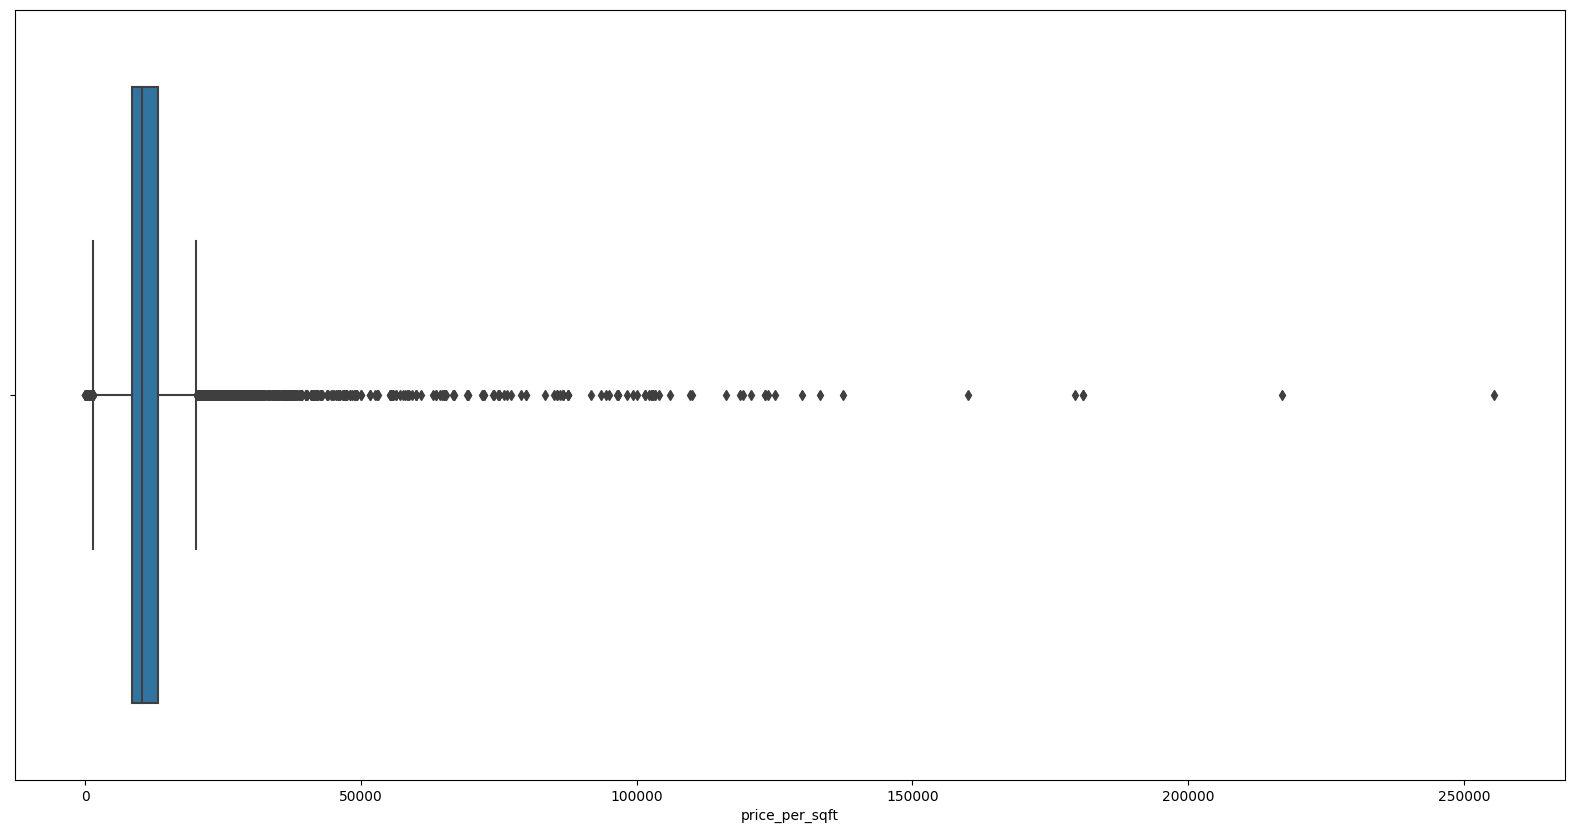

In [271]:
sns.boxplot(x=df5.price_per_sqft)

In [272]:
df5.shape

(14628, 8)

In [273]:
# calculate mean & std price per location

def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'): #Grouping the data by the 'location' column.
        # each group within each location, calculating the mean (m) and standard deviation (st)
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)

        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]

        # Concatenating the filtered subdataframes into a new DataFrame
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out


df6 = remove_pps_outliers(df5)
df6.shape

(13050, 8)

<Axes: xlabel='price_per_sqft'>

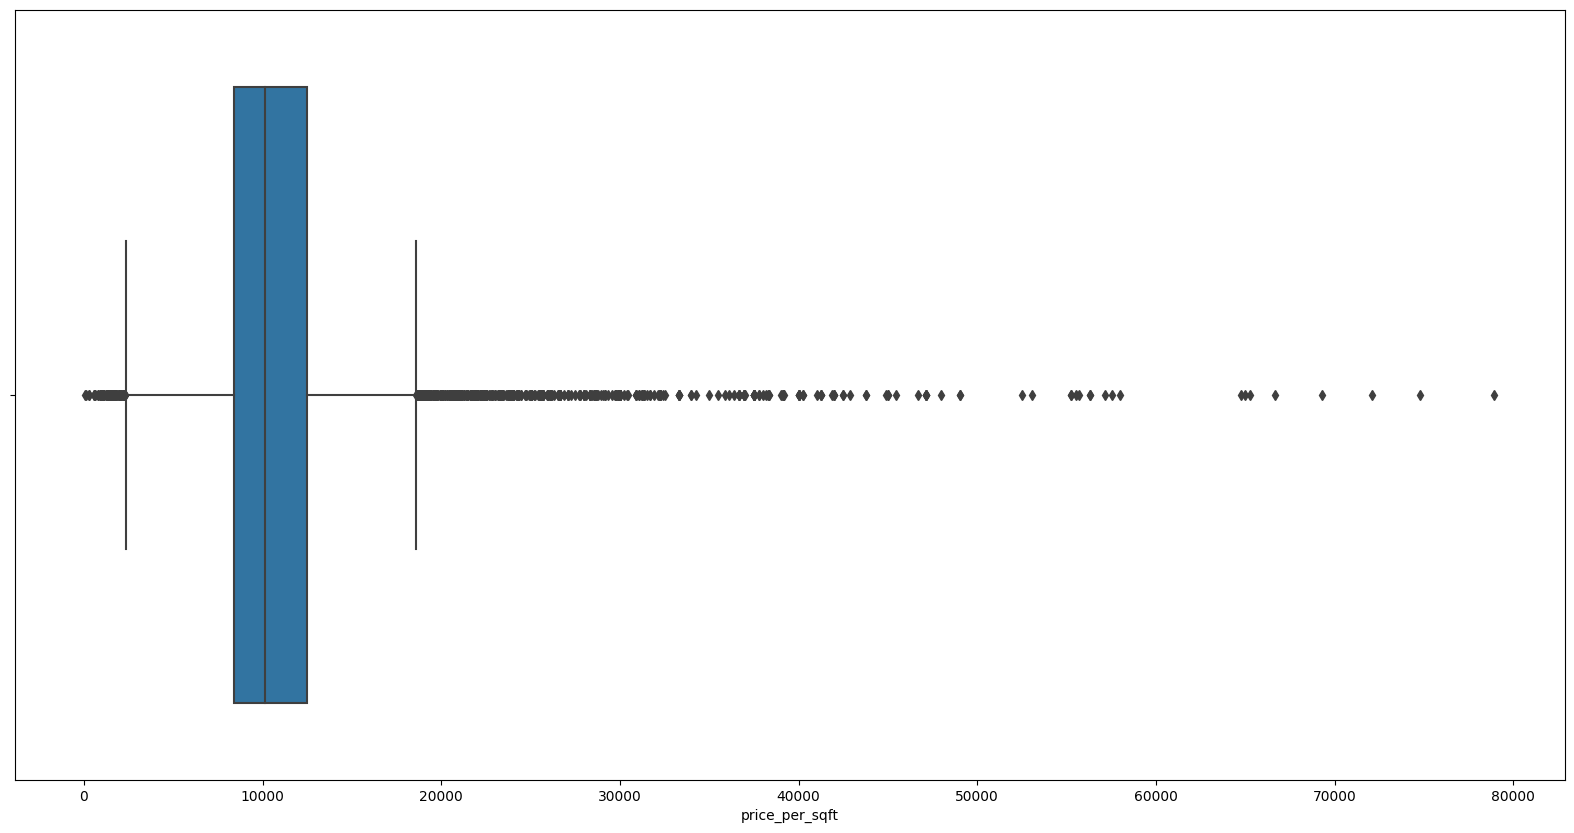

In [274]:
sns.boxplot(x=df6.price_per_sqft)

By removing outliers max price per squre feet is reduce to Rs 80,000

In [275]:
df6.head(2)

,Lat,Lon,price,house_size,location,bath,bed,price_per_sqft
0,80.3623,5.973516,7000000,1000.0,Ahangama,1,3,7000.000000
1,80.3623,5.973516,5800000,1127.0,Ahangama,1,1,5146.406389


Text(0, 0.5, 'Count')

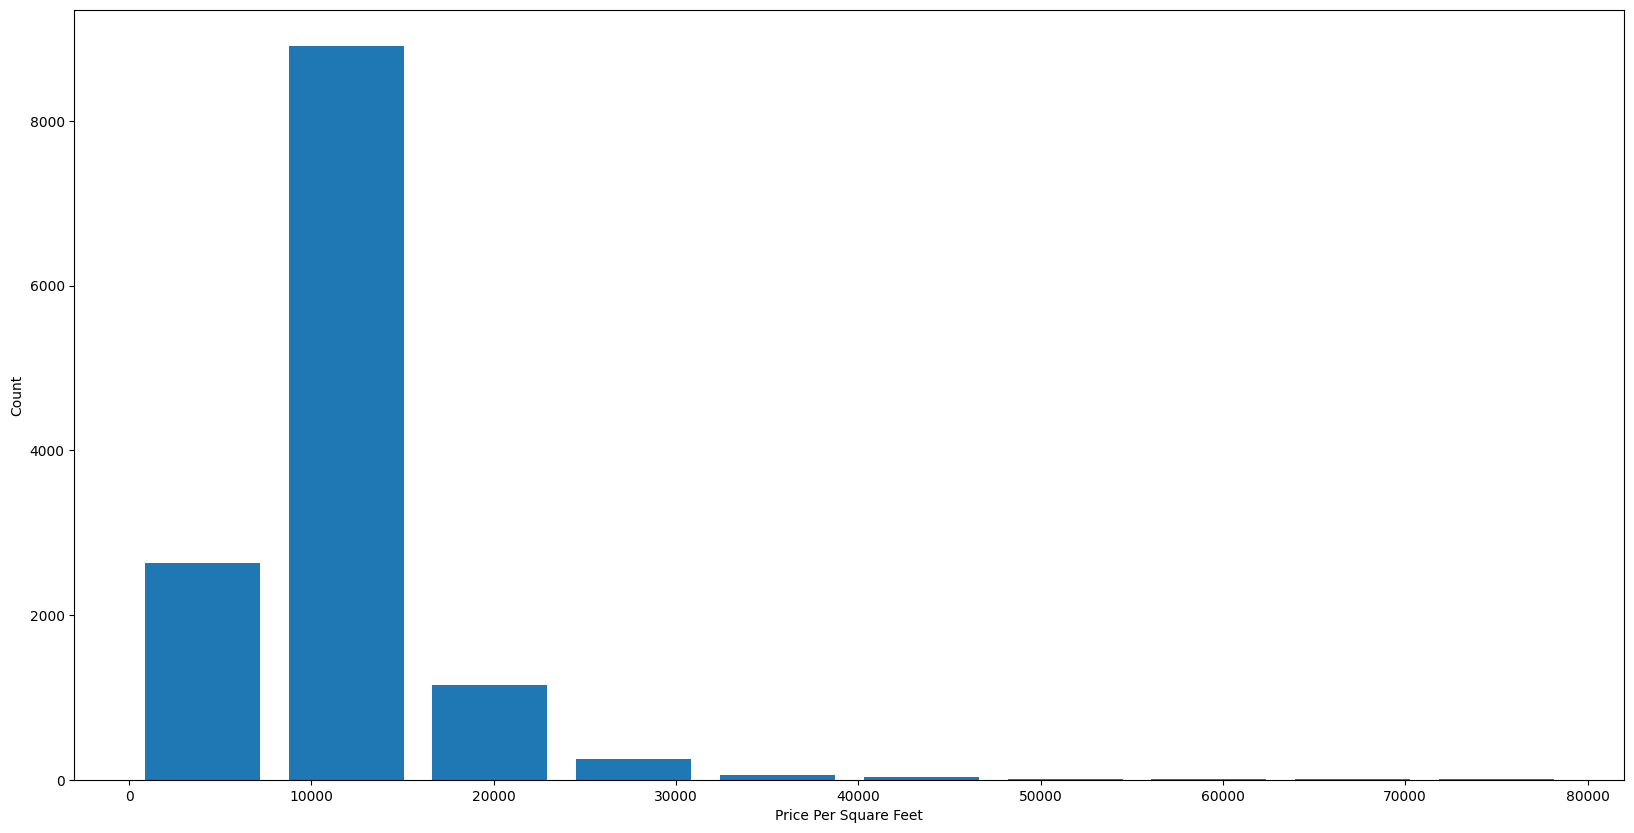

In [276]:
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(df6.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

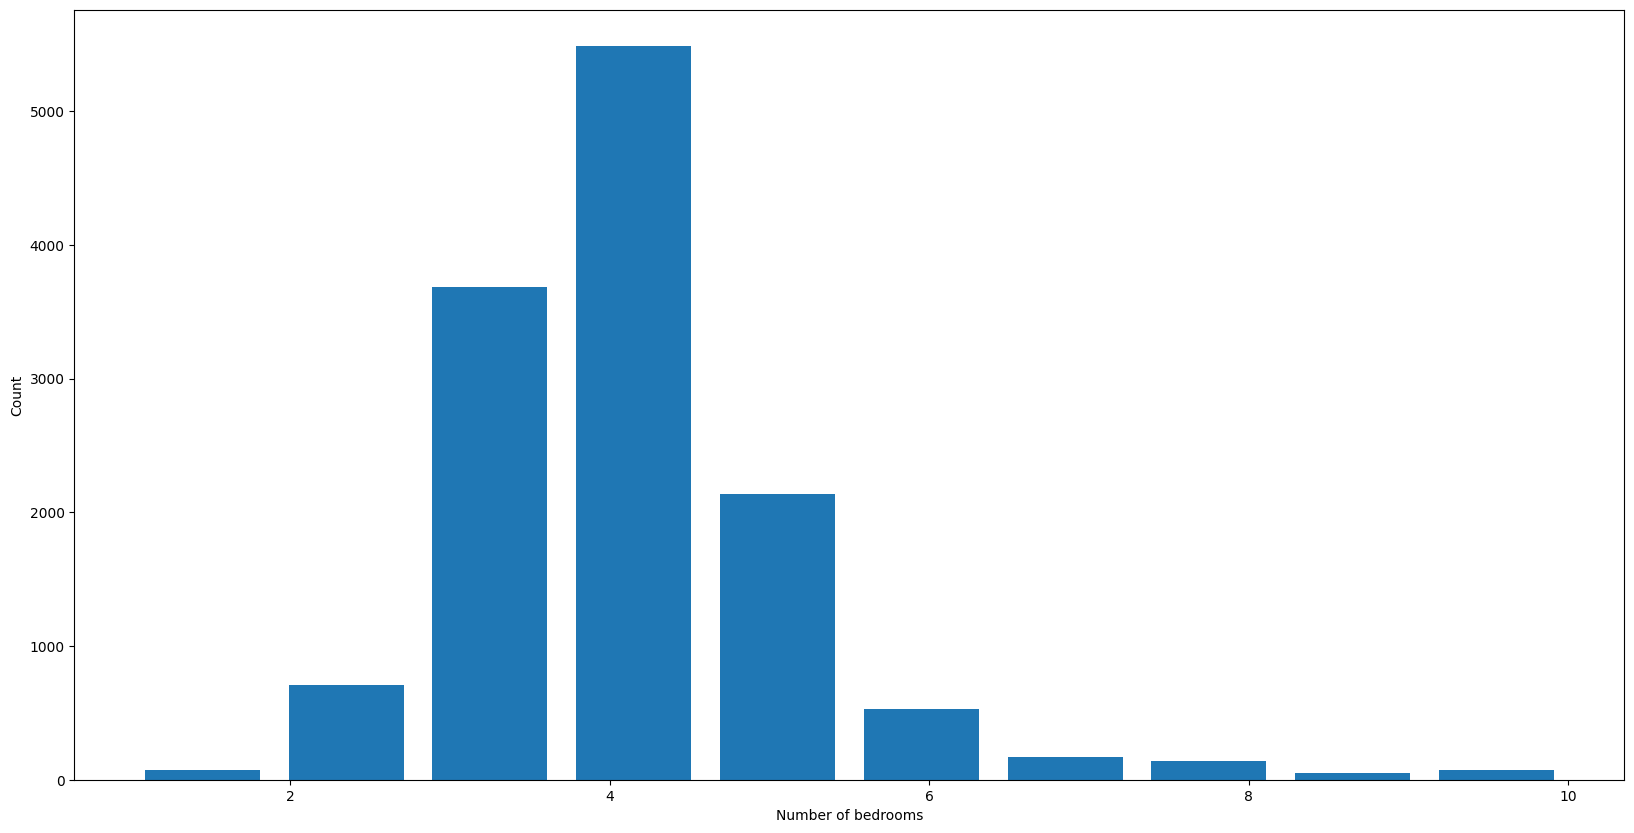

In [277]:
plt.hist(df6.bed,rwidth=0.8)
plt.xlabel("Number of bedrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

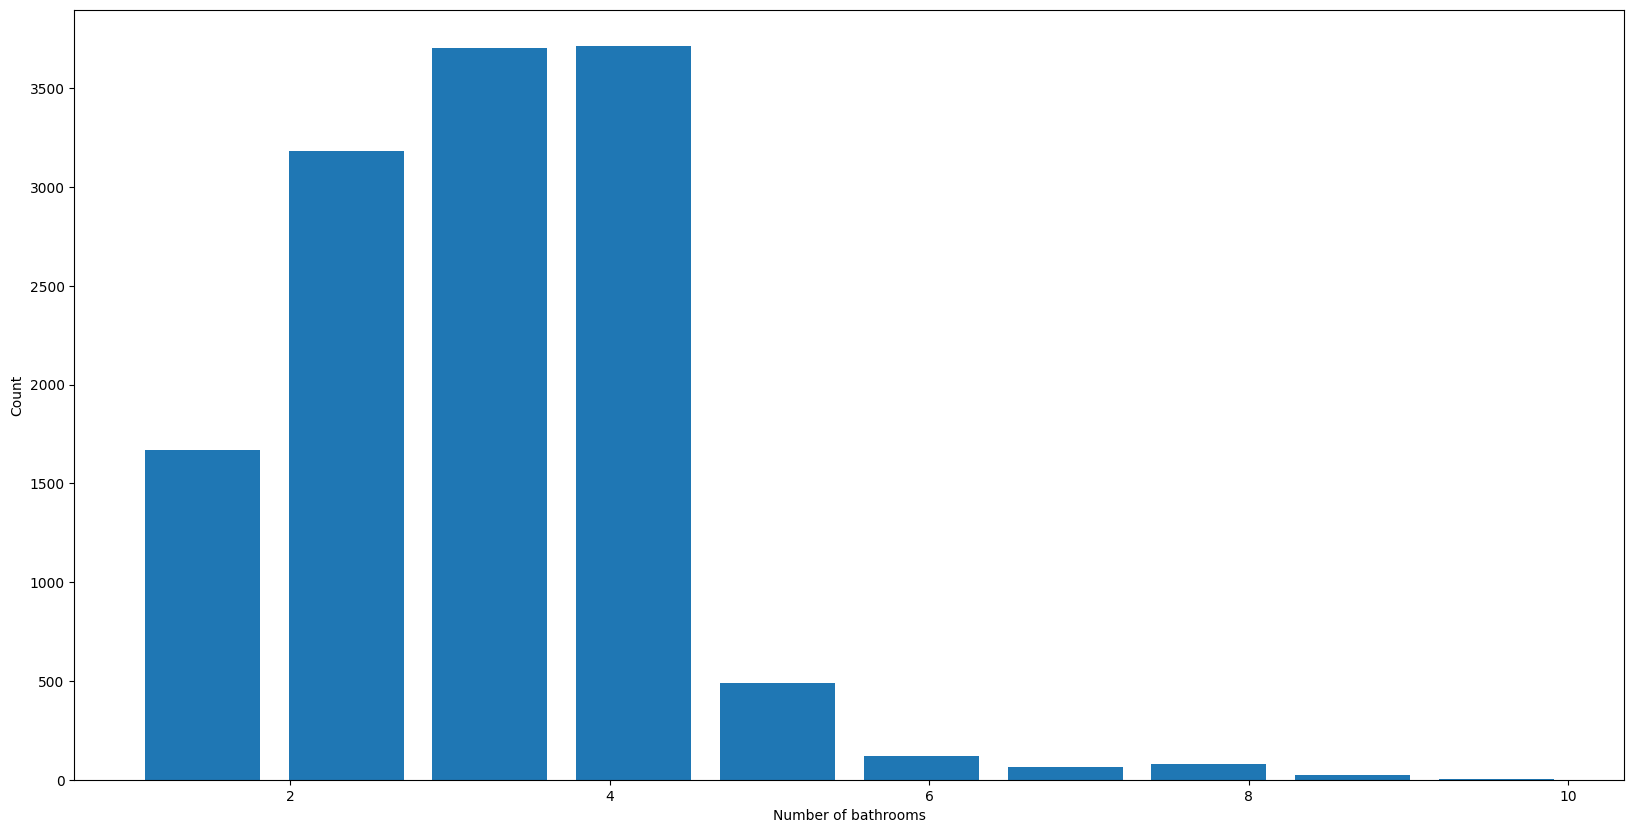

In [278]:
plt.hist(df6.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

##Model building

In [279]:
df6.head(2)

,Lat,Lon,price,house_size,location,bath,bed,price_per_sqft
0,80.3623,5.973516,7000000,1000.0,Ahangama,1,3,7000.000000
1,80.3623,5.973516,5800000,1127.0,Ahangama,1,1,5146.406389


Use One Hot Encording to convert text in location to numeric

In [280]:
dummies = pd.get_dummies(df6.location)
dummies.head()

,Ahangama,Akuressa,Ambalangoda,AmparaCity,Angoda,AnuradhapuraCity,Athurugiriya,Baddegama,BadullaCity,Balangoda,...,Tissamaharama,Ukuwela,Veyangoda,Wadduwa,Wariyapola,Wattala,Weligama,Wellampitiya,Wennappuwa,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [294]:
df7 = pd.concat([df6.drop('location', axis=1), dummies.drop('other', axis=1)], axis=1)
df7.head()

,Lat,Lon,price,house_size,bath,bed,price_per_sqft,Ahangama,Akuressa,Ambalangoda,...,Tangalla,Tissamaharama,Ukuwela,Veyangoda,Wadduwa,Wariyapola,Wattala,Weligama,Wellampitiya,Wennappuwa
0,80.36230,5.973516,7000000,1000.0,1,3,7000.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,80.36230,5.973516,5800000,1127.0,1,1,5146.406389,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,80.36230,5.973516,8400000,1350.0,1,3,6222.222222,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,80.36230,5.973516,7000000,1000.0,1,3,7000.000000,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,80.47751,6.100507,19500000,2500.0,2,3,7800.000000,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [296]:
X = df7.drop('price', axis=1)
y = df7['price']

Import train_test_split

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10440, 110), (2610, 110), (10440,), (2610,))

1. Linear Regression

In [300]:
from sklearn.linear_model import LinearRegression

In [301]:
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9195097597066819

2. Cross Validation

In [302]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.92547124, 0.81412701, 0.89129232, 0.91739532, 0.90459501])

3. Decision Tree Regressor

In [304]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr.score(X_test, y_test)

0.9871160117922756

DecisionTreeRegressor is giving the highest accuracy

## Predictive system

In [305]:
def predict_price(location,sqft,bath,bed):
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bed

    if loc_index >= 0:
        x[loc_index] = 1

    return dtr.predict([x])[0]

In [306]:
df6.location.unique()

array(['Ahangama', 'Akuressa', 'Ambalangoda', 'AmparaCity', 'Angoda',
       'AnuradhapuraCity', 'Athurugiriya', 'Baddegama', 'BadullaCity',
       'Balangoda', 'Bandaragama', 'Bandarawela', 'Batapola',
       'Battaramulla', 'BatticaloaCity', 'Boralesgamuwa', 'Chilaw',
       'Colombo10', 'Colombo14', 'Colombo15', 'Colombo3', 'Colombo4',
       'Colombo5', 'Colombo6', 'Colombo7', 'Colombo8', 'Colombo9',
       'Dankotuwa', 'Dehiwala', 'Delgoda', 'Deniyaya', 'Digana',
       'Divulapitiya', 'Elpitiya', 'Embilipitiya', 'GalleCity',
       'GampahaCity', 'Gampola', 'Ganemulla', 'Godagama', 'Hanwella',
       'Hikkaduwa', 'Homagama', 'Horana', 'Ja-Ela', 'JaffnaCity',
       'Kadawatha', 'Kaduwela', 'KalutaraCity', 'Kandana', 'KandyCity',
       'Karapitiya', 'Katugastota', 'Katunayake', 'KegalleCity',
       'Kelaniya', 'Kesbewa', 'Kiribathgoda', 'Kohuwala', 'Kolonnawa',
       'Kottawa', 'Kotte', 'Kundasale', 'KurunegalaCity', 'Maharagama',
       'Malabe', 'MataleCity', 'MataraCity', 'M

In [309]:
predict_price('KurunegalaCity', 3000, 1, 6)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


1700000.0